In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename), "filename: ", filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# TEST DATASET LOADING

In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # graphics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
filelist = []

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        filelist.append(os.path.join(dirname, filename))
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
from PIL import Image
labels = []
images = []

In [15]:
#Importing Images from File-List
for image_path in filelist[2:]:
    image = Image.open(image_path)
    image = image.convert('RGB') #Removing Transparency Channel from PNG(To match dimensions with some JPG images)
    image = np.array(image)
    image = image/255 #Normalization
    
    image_label = image_path.split("/")[-1].split(".")[0]
    
    images.append(image)
    labels.append(image_label)

In [16]:
#Stacking Images to a Numpy Array
images = np.stack(images)
print(images.shape)

(2140, 50, 200, 3)


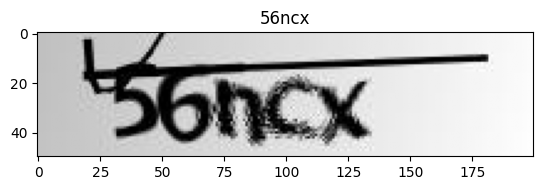

[[[0.75294118 0.75294118 0.75294118]
  [0.75294118 0.75294118 0.75294118]
  [0.75294118 0.75294118 0.75294118]
  ...
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]]

 [[0.75294118 0.75294118 0.75294118]
  [0.75294118 0.75294118 0.75294118]
  [0.75294118 0.75294118 0.75294118]
  ...
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]]

 [[0.75294118 0.75294118 0.75294118]
  [0.75294118 0.75294118 0.75294118]
  [0.75294118 0.75294118 0.75294118]
  ...
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]]

 ...

 [[0.76470588 0.76470588 0.76470588]
  [0.76470588 0.76470588 0.76470588]
  [0.76470588 0.76470588 0.76470588]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 [[0.76470588 0.76470588 0.76470588]
  [0.76470588 0.76470588 0.76470588]


In [17]:
plt.imshow(images[10])
plt.title(labels[10])
plt.axis('on')  # Turn off axis labels
plt.show()

print(images[10])

# MODEL INFERENCE

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os

# Define the ResNet-based CAPTCHA model (same architecture used during training)
class ResNetCaptchaModel(nn.Module):
    def __init__(self, num_classes_per_char, num_chars):
        super(ResNetCaptchaModel, self).__init__()
        self.resnet = models.resnet50(pretrained=False)  # Used pretrained=True during training
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes_per_char * num_chars)
        self.num_classes_per_char = num_classes_per_char
        self.num_chars = num_chars

    def forward(self, x):
        x = self.resnet(x)
        x = x.view(-1, self.num_chars, self.num_classes_per_char)  # Reshape output
        return x

# Initialize the model (same as during training)
num_classes_per_char = 36  # 10 digits + 26 letters
num_chars = 5  # Assuming CAPTCHA length is 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ResNetCaptchaModel(num_classes_per_char, num_chars).to(device)

# Load the weights (use map_location if on CPU)
model_path = "../input/captcha_resnet/pytorch/default/1/captcha_resnet50.pth"
checkpoint = torch.load(model_path, map_location=device)
model.load_state_dict(checkpoint)

# Make sure to set the model to evaluation mode
model.eval()

# Example prediction on a single image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/tmp/ipykernel_30/807465099.py:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions

In [2]:
model

ResNetCaptchaModel(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(


In [2]:
# Load your test image
sample_image_path = "../input/captcha-version-2-images/samples/24pew.png"
sample_image = Image.open(sample_image_path).convert('RGB')
sample_image = transform(sample_image).unsqueeze(0).to(device)

# Perform prediction
with torch.no_grad():
    outputs = model(sample_image)  # (1, num_chars, num_classes_per_char)

predicted_chars = []
for i in range(num_chars):
    _, predicted = torch.max(outputs[:, i, :], 1)
    predicted_chars.append(predicted.item())

# Convert indices back to characters
captcha_text = ''.join([chr(c + ord('0')) if c < 10 else chr(c - 10 + ord('A')) for c in predicted_chars])

print(f"Predicted CAPTCHA: {captcha_text}")

Predicted CAPTCHA: 24PEW


In [5]:
import numpy as np 

filelist = []
images = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        filelist.append(os.path.join(dirname, filename))

filelist_imgs = filelist[2:] # remove the models from input, leave only imgs
for image_path in filelist_imgs:
    image = Image.open(image_path).convert('RGB')
    image = np.array(image)
    image = image / 255 
    images.append(image)
    


# Test for multiple pictures

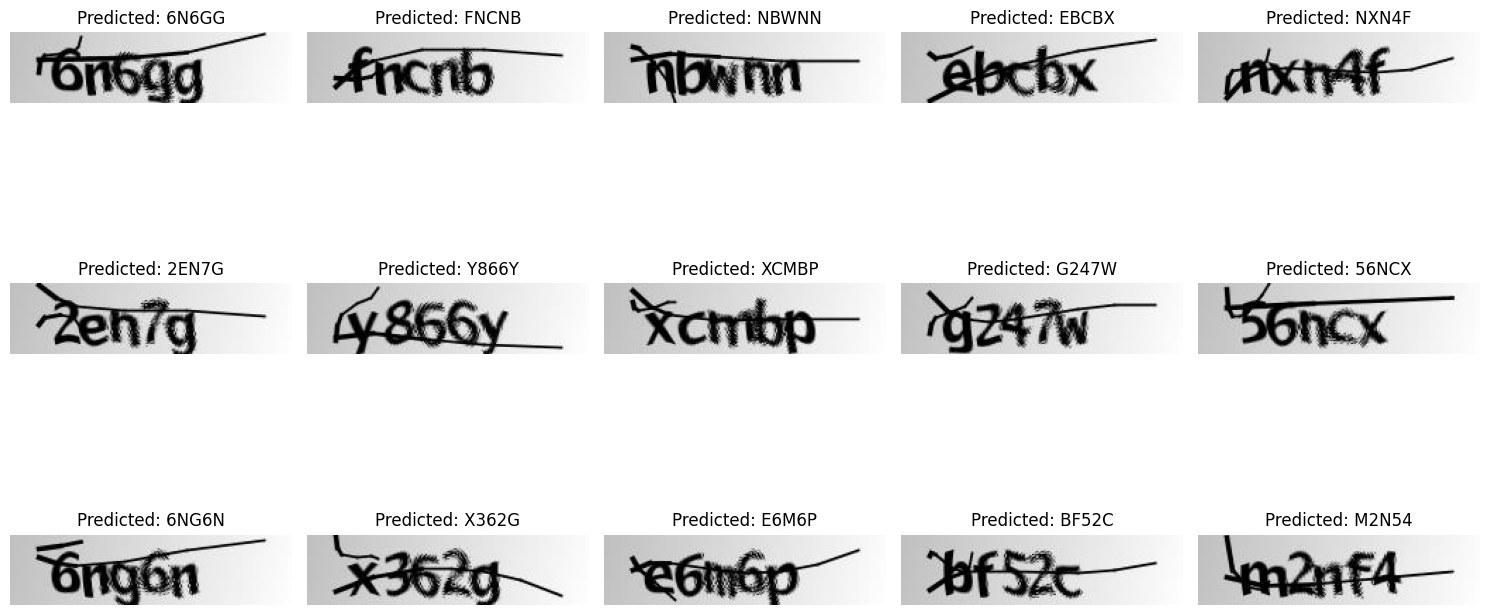

In [24]:
import os
import torch
from PIL import Image
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load the pre-trained model
model_path = "../input/captcha_resnet/pytorch/default/1/captcha_resnet50.pth"
model = ResNetCaptchaModel(num_classes_per_char, num_chars).to(device)
checkpoint = torch.load(model_path)
model.load_state_dict(checkpoint)
model.eval()  # Set model to evaluation mode

# Define the transformation (assuming it's the same as used during training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Function to predict CAPTCHA from an image
def predict_captcha(image_path, model, device, transform):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)  # Add batch dimension and send to device

    with torch.no_grad():
        outputs = model(image)  # Forward pass

    predicted_chars = []
    for i in range(num_chars):
        _, predicted = torch.max(outputs[:, i, :], 1)
        predicted_chars.append(predicted.item())

    # Convert indices back to characters (0-9 and A-Z)
    captcha_text = ''.join([chr(c + ord('0')) if c < 10 else chr(c - 10 + ord('A')) for c in predicted_chars])

    return captcha_text

# Iterate over all images in the dataset and predict CAPTCHAs
captcha_image_dir = '/kaggle/input/captcha-version-2-images/samples'  # Adjust the path as needed
image_filenames = [f for f in os.listdir(captcha_image_dir) if f.endswith('.png')]  # List of all .png files
  
    
N = 15 

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for idx, img_file in enumerate(image_filenames[:N]):
    img_path = os.path.join(captcha_image_dir, img_file)
    predicted_captcha = predict_captcha(img_path, model, device, transform)
    img = Image.open(img_path)
    axes[idx].imshow(img)
    axes[idx].set_title(f"Predicted: {predicted_captcha}")
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Implement adversarial attacks
## PGD

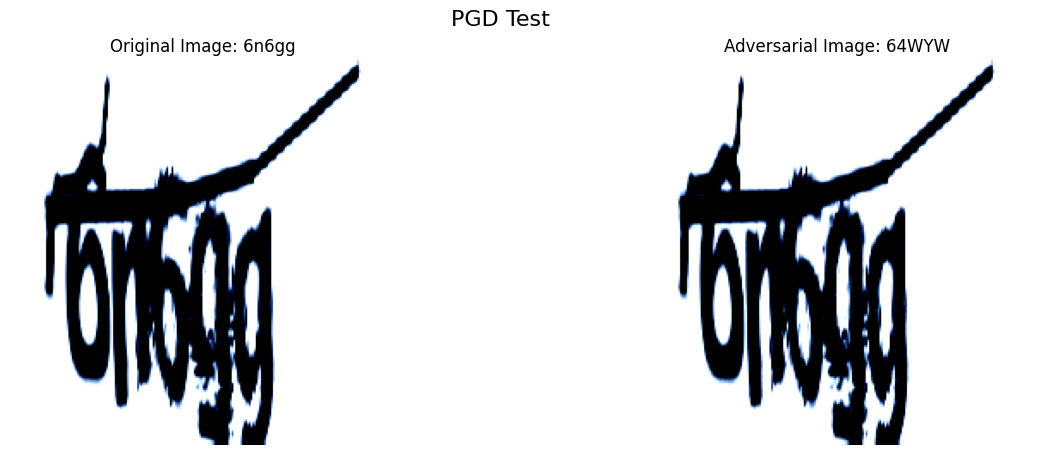

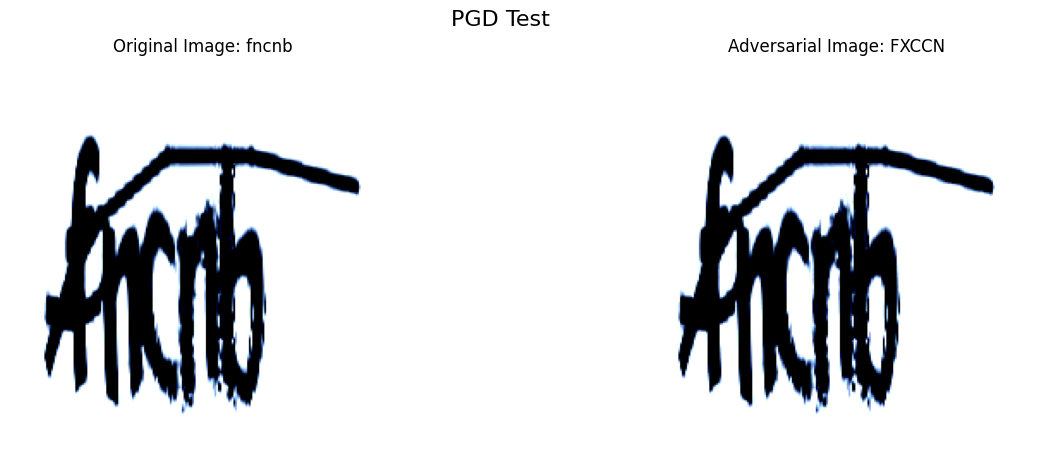

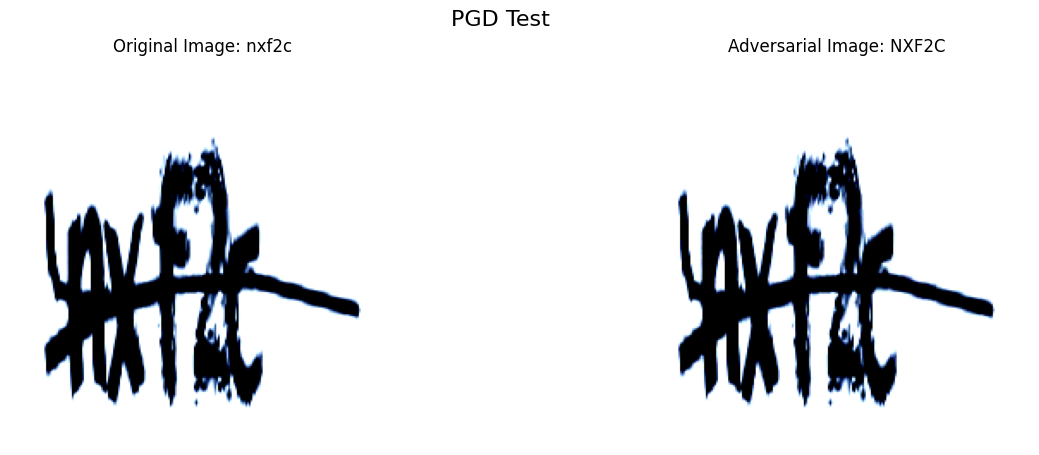

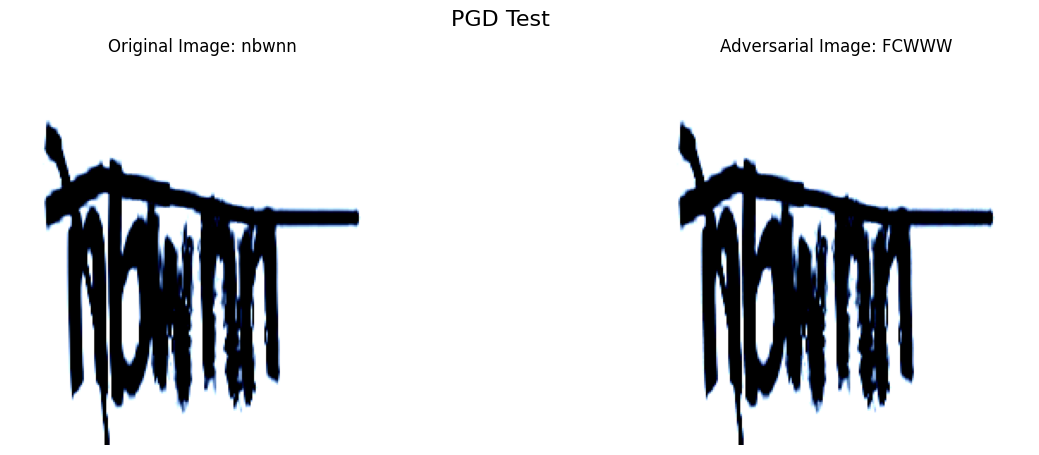

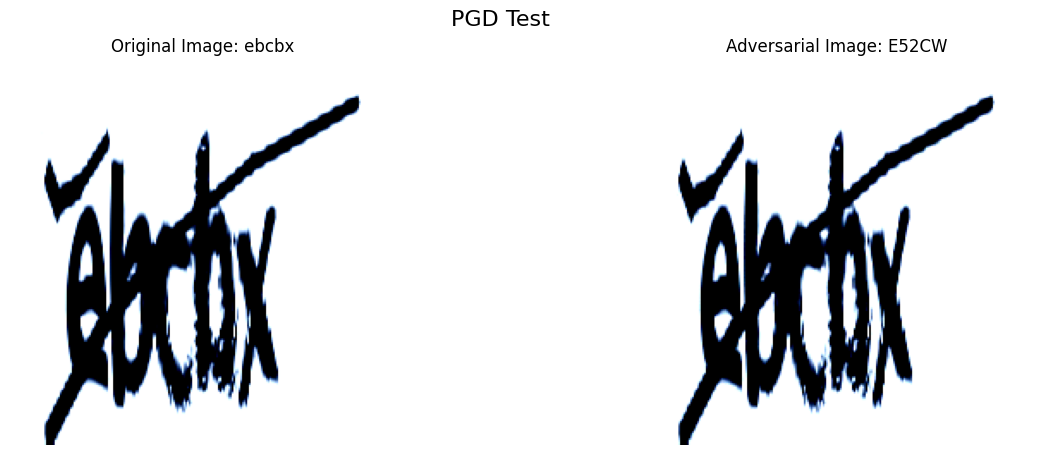

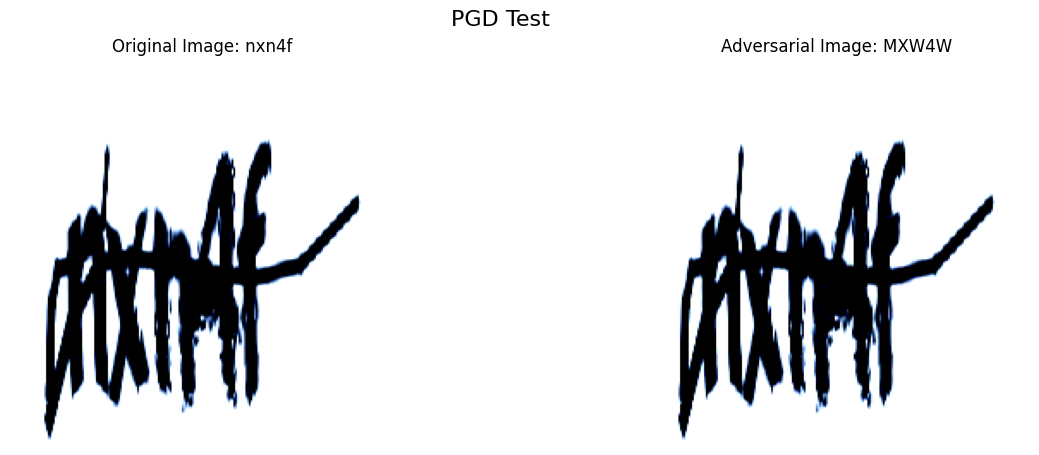

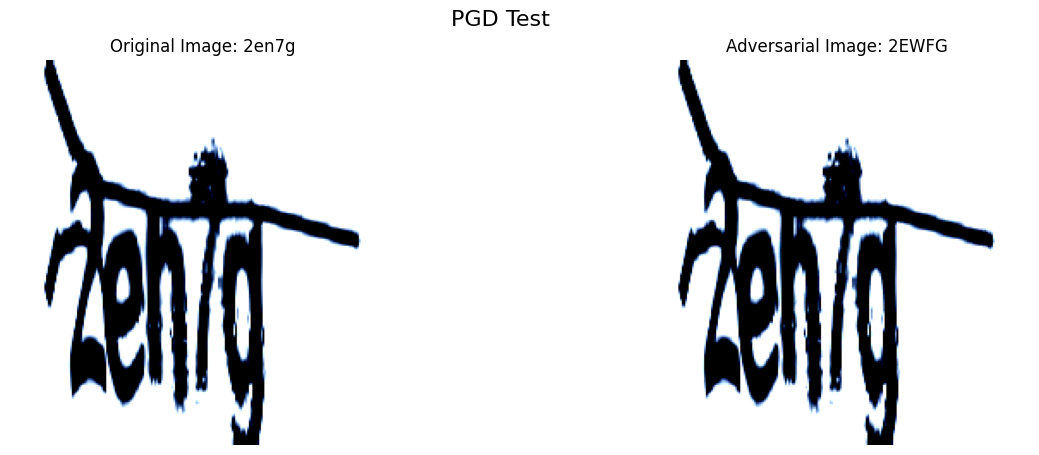

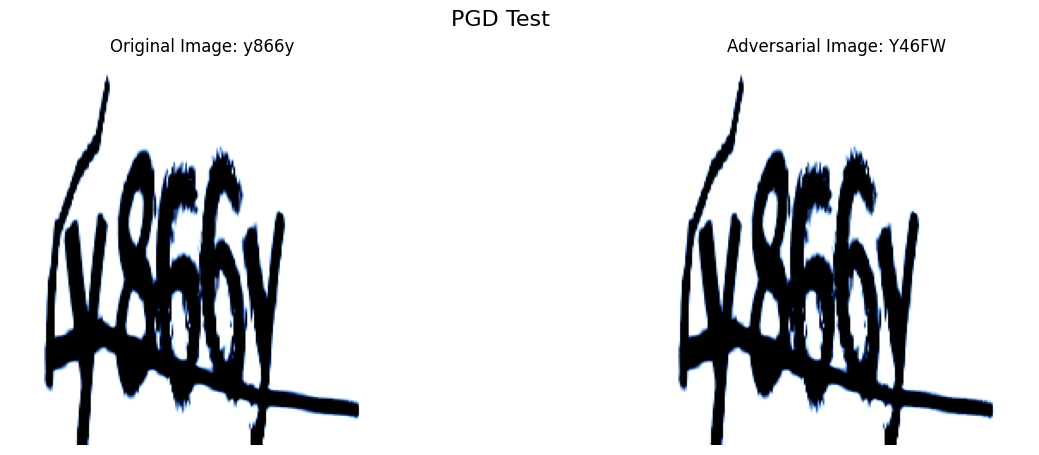

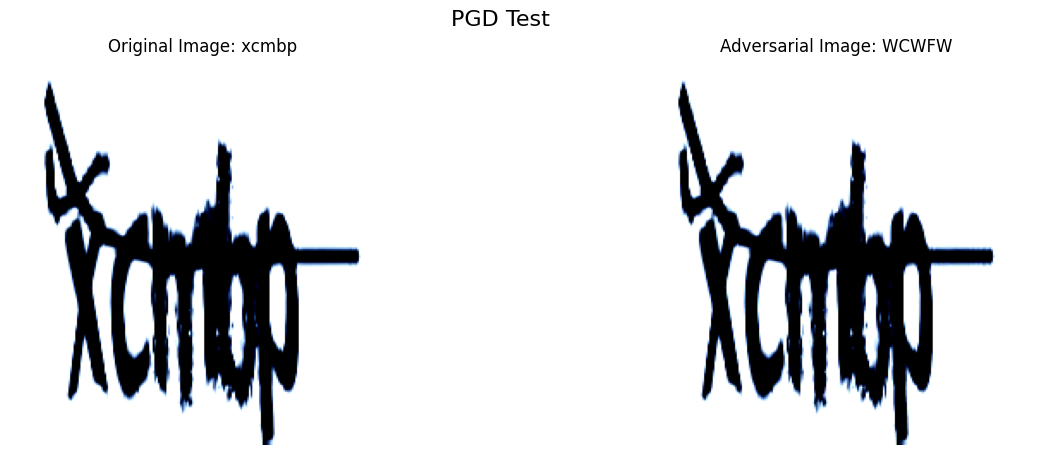

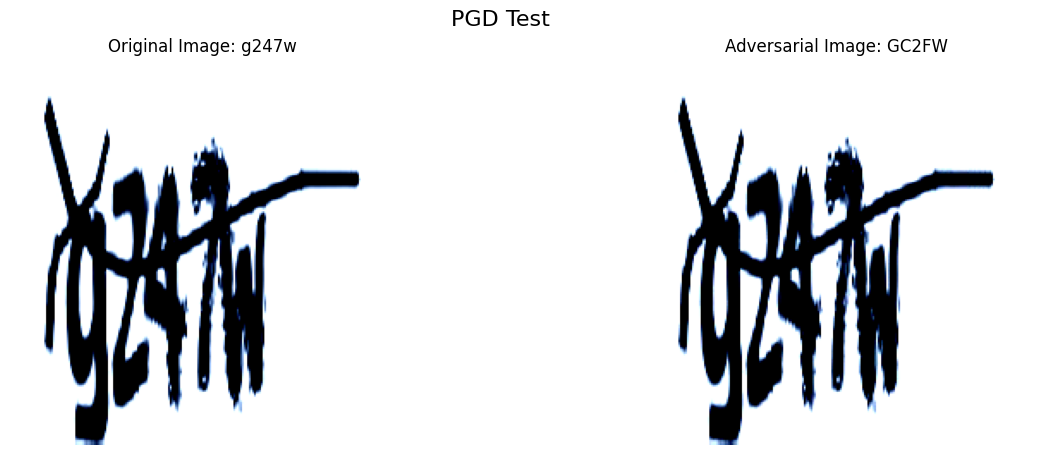

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from PIL import Image
import os

# Define the PGD attack
def pgd_attack(model, images, labels, eps, alpha, iters):
    images = images.clone().detach().to(device)
    labels = labels.to(device)
    original_images = images.clone().detach()

    # Set the images to require gradients
    images.requires_grad = True
    
    for i in range(iters):
        outputs = model(images)
        loss = nn.CrossEntropyLoss()(outputs.view(-1, num_classes_per_char), labels.view(-1))
        
        model.zero_grad()
        loss.backward()
        
        # Update the images based on gradient information
        images = images + alpha * images.grad.sign()
        
        # Clamp images to maintain within eps bounds and normalize
        eta = torch.clamp(images - original_images, min=-eps, max=eps)
        images = torch.clamp(original_images + eta, min=0, max=1).detach_()
        
        images.requires_grad = True
    
    return images

# Transformations for images (same as in your training pipeline)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# PGD attack parameters
eps = 0.03  # Maximum perturbation (epsilon)
alpha = 0.01  # Step size (alpha)
iters = 40  # Number of iterations

import matplotlib.pyplot as plt

# Update the function to return the original image for comparison
def predict_and_attack_captcha(image_path, model, device, transform, eps, alpha, iters):
    # Load and transform the image
    image = Image.open(image_path).convert('RGB')
    original_image = transform(image).unsqueeze(0).to(device)
    
    # Perform PGD attack
    labels = torch.randint(0, num_classes_per_char, (1, num_chars)).to(device)  # Dummy labels for loss computation
    adv_image = pgd_attack(model, original_image, labels, eps, alpha, iters)

    # Predict on the adversarially perturbed image
    with torch.no_grad():
        outputs = model(adv_image)
    
    predicted_chars = []
    for i in range(num_chars):
        _, predicted = torch.max(outputs[:, i, :], 1)
        predicted_chars.append(predicted.item())

    # Convert indices back to characters
    captcha_text = ''.join([chr(c + ord('0')) if c < 10 else chr(c - 10 + ord('A')) for c in predicted_chars])
    
    return captcha_text, adv_image, original_image  # Return both adversarial and original images

# Define the CAPTCHA directory and iterate through images
captcha_img_dir = "../input/captcha-version-2-images/samples"
image_filenames = [f for f in os.listdir(captcha_img_dir) if f.endswith(".png") or f.endswith(".jpg")]

# Process and display for the first N images
num_display = 10
for idx, img_file in enumerate(image_filenames[:num_display]):
    img_path = os.path.join(captcha_img_dir, img_file)
    predicted_text, adv_image, original_image = predict_and_attack_captcha(img_path, model, device, transform, eps, alpha, iters)
    
    # Move images back to CPU for plotting, and detach from computation graph
    adv_image = adv_image.detach().squeeze(0).cpu().permute(1, 2, 0).numpy()  # Detach, remove batch dim, transpose for plotting
    original_image = original_image.detach().squeeze(0).cpu().permute(1, 2, 0).numpy()

    # Plot original and adversarial images side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].imshow(original_image)
    axes[0].set_title(f"Original Image: {img_file.split('.')[0]}")
    axes[0].axis('off')

    axes[1].imshow(adv_image)
    axes[1].set_title(f"Adversarial Image: {predicted_text}")
    axes[1].axis('off')
    fig.suptitle("PGD Test", fontsize=16)

    plt.show()


## C&W Attack

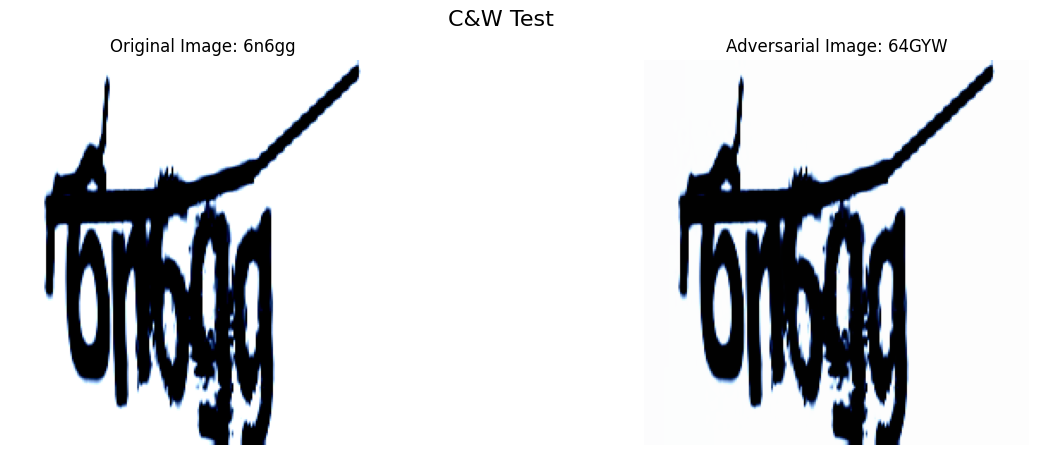

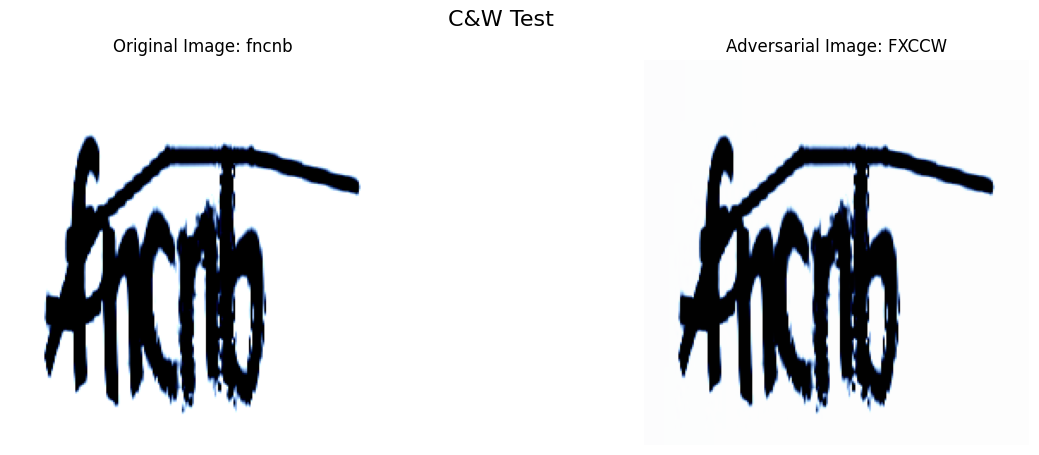

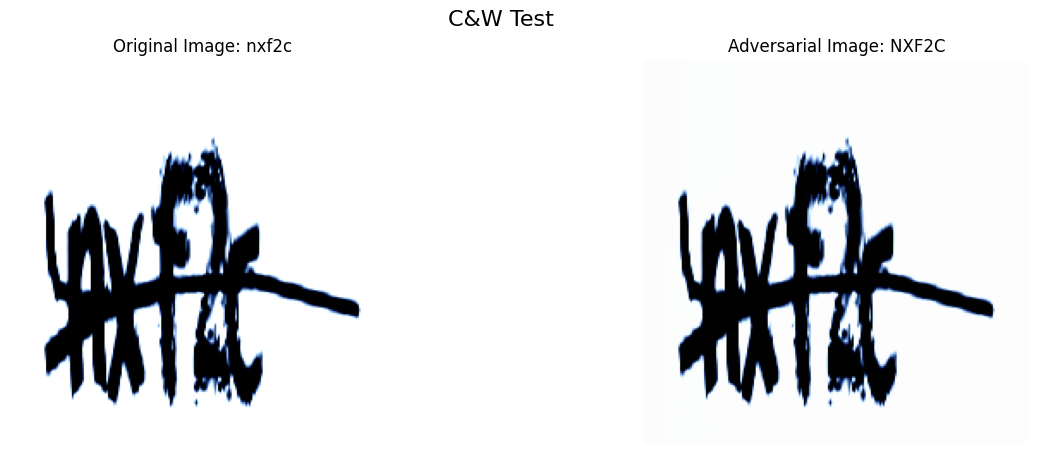

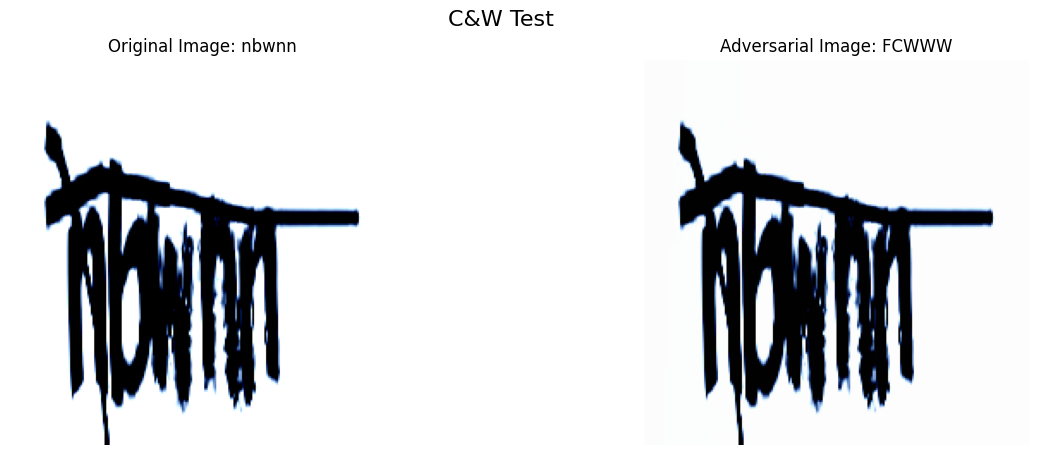

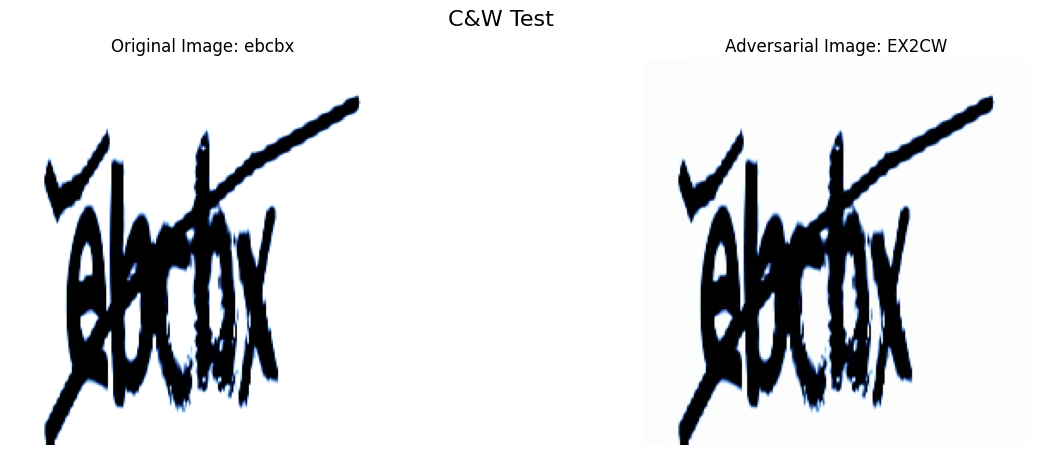

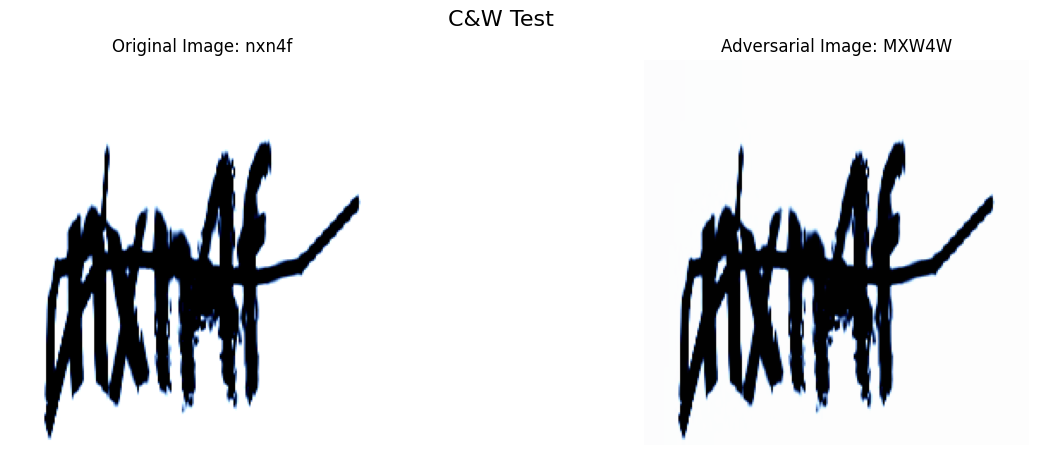

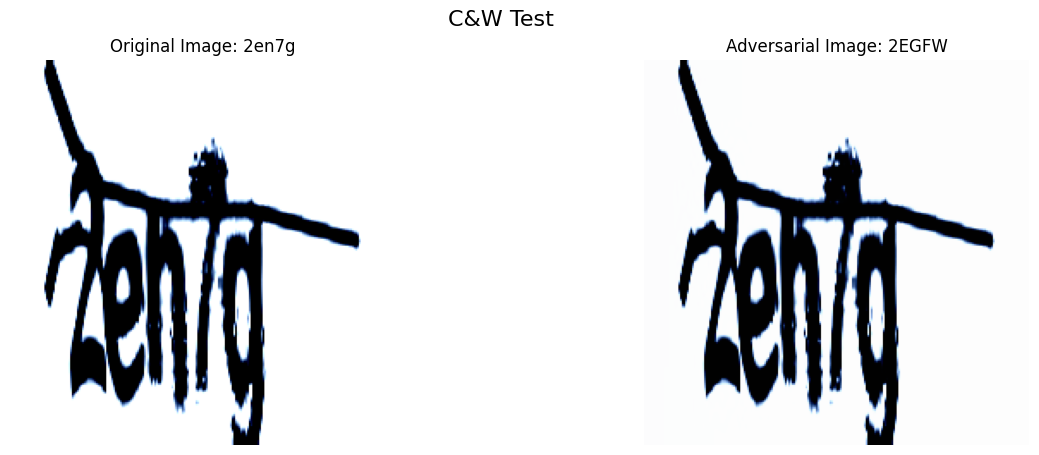

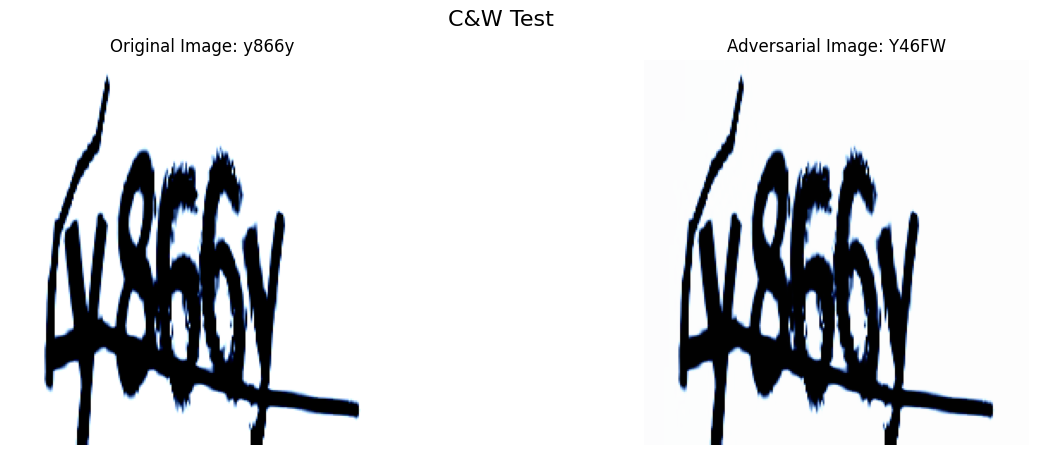

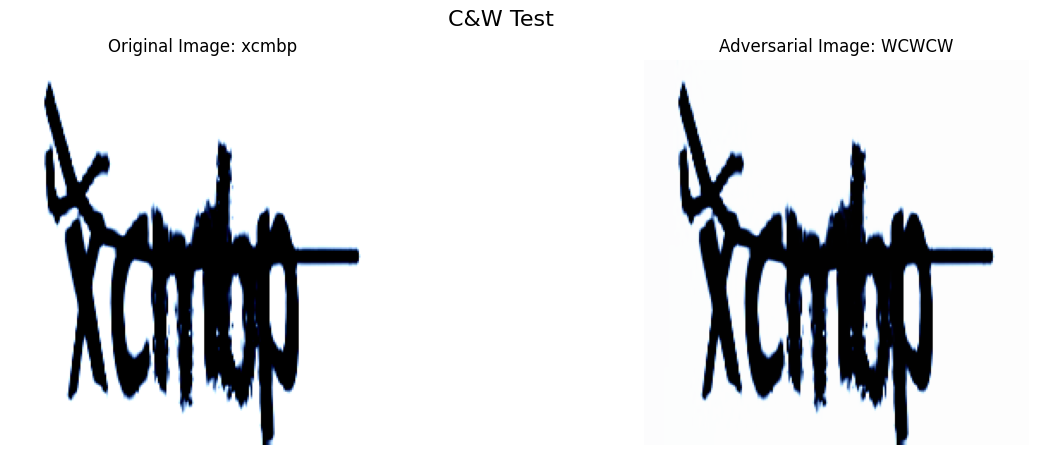

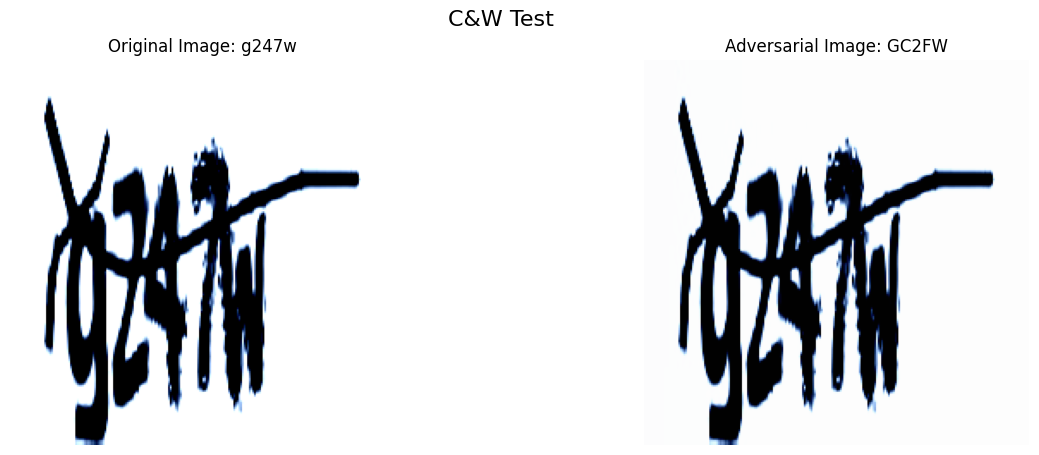

In [26]:
import torch
import torch.optim as optim
import torch.nn as nn

def cw_l2(model, loss_fn, X, y, c, num_iter, lr):

  def f(delta, X, y, model, loss_fn):
    outputs = model(X)
    return -loss_fn(outputs.view(-1, num_classes_per_char), y.view(-1))
                      
  # Change of variables from original paper
  w = torch.zeros_like(X, requires_grad=True).to("cuda")
  
  optimizer = optim.Adam([w], lr=lr)
  loss_d = nn.MSELoss(reduction='sum')
  loss_f = torch.sum

  for i in range(num_iter):
    # Change of variables from original paper
    delta = 1/2 * (nn.Tanh()(w) + 1) - X
    
    # minimizing both negative loss of target and distance of attack
    overall_loss = loss_d(delta+X, X) + loss_f(c*f(delta, X, y, model, loss_fn))
    
    overall_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  
  return delta.detach()


c=1e-3
num_iter=1000
lr=0.01


# Update the function to return the original image for comparison
def predict_and_attack_captcha(image_path, model, device, transform, eps, alpha, iters):
    # Load and transform the image
    image = Image.open(image_path).convert('RGB')
    original_image = transform(image).unsqueeze(0).to(device)
    
    # Perform C&W attack
    labels = torch.randint(0, num_classes_per_char, (1, num_chars)).to(device)  
    adv_input = cw_l2(model, nn.CrossEntropyLoss(), original_image, labels, c, num_iter, lr)
    adv_image = original_image + adv_input

    # Ensure the adversarial image is valid (clamp it to valid pixel values)
    adv_image = torch.clamp(adv_image, 0, 1)

    # Predict on the adversarially perturbed image
    with torch.no_grad():
        outputs = model(adv_image)
    
    predicted_chars = []
    for i in range(num_chars):
        _, predicted = torch.max(outputs[:, i, :], 1)
        predicted_chars.append(predicted.item())

    # Convert indices back to characters
    captcha_text = ''.join([chr(c + ord('0')) if c < 10 else chr(c - 10 + ord('A')) for c in predicted_chars])
    
    return captcha_text, adv_image, original_image  # Return both adversarial and original images

# Define the CAPTCHA directory and iterate through images
captcha_img_dir = "../input/captcha-version-2-images/samples"
image_filenames = [f for f in os.listdir(captcha_img_dir) if f.endswith(".png") or f.endswith(".jpg")]

# Process and display for the first N images
num_display = 10
for idx, img_file in enumerate(image_filenames[:num_display]):
    img_path = os.path.join(captcha_img_dir, img_file)
    adv_input = predict_and_attack_captcha(img_path, model, device, transform, eps, alpha, iters)
    predicted_text, adv_image, original_image = predict_and_attack_captcha(img_path, model, device, transform, eps, alpha, iters)
    
    # Move images back to CPU for plotting, and detach from computation graph
    adv_image = adv_image.detach().squeeze(0).cpu().permute(1, 2, 0).numpy()  # Detach, remove batch dim, transpose for plotting
    original_image = original_image.detach().squeeze(0).cpu().permute(1, 2, 0).numpy()

    # Plot original and adversarial images side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].imshow(original_image)
    axes[0].set_title(f"Original Image: {img_file.split('.')[0]}")
    axes[0].axis('off')

    axes[1].imshow(adv_image)
    axes[1].set_title(f"Adversarial Image: {predicted_text}")
    axes[1].axis('off')
    fig.suptitle("C&W Test", fontsize=16)

    plt.show()
